# Part 1: Introduction to Python
## 1.1 [About Python](https://lectures.quantecon.org/py/about_py.html#id3)
### 1.1.1 Overview
### 1.1.2 What's Python?
### 1.1.3 Scientific Programming
- [Machine learing and data science](http://scikit-learn.org/stable/)
- [Astronomy(天文学)](http://www.astropy.org/)
- [Artificial intelligence](https://wiki.python.org/moin/PythonForArtificialIntelligence)
- [Chemistry](http://chemlab.github.io/chemlab/)
- [Computational biology](http://biopython.org/)
- [Meteorology(气象学)](https://pypi.python.org/pypi/metrology)

### 1.1.4 Learn More
#### Numerical Programming

In [8]:
import numpy as np                      # Load the library

a = np.linspace(-np.pi,np.pi,100)        # Create even grid from -pi to pi
b = np.cos(a)                            # Apply cosine to each element of a
c = np.sin(a)                            # Apply sin to each element of a

In [9]:
np.dot(b,c)       # matrix multiplication

4.0489125678221401e-16

In [10]:
b @ c            # matrix multiplication
# element-wise product: np.multiply(), 或 *

4.0489125678221401e-16

#### SciPy
The SciPy library is built on top of NumPy and provides additional functionality For example, let’s calculate $\int^2_{-2}{\phi(z)dz}$ where $\phi$ is the standard normal density

In [11]:
from scipy.stats import norm
from scipy.integrate import quad

theta = norm()
value, error = quad(theta.pdf, -2, 2)     # Integrate using Gaussian quadrature
value

0.9544997361036417

In [12]:
import scipy.stats             
value=1-2*scipy.stats.norm.cdf(-2,loc=0,scale=1)              #http://blog.csdn.net/claroja/article/details/72830515
value

0.95449973610364158

SciPy includes many of the standard routines used in
- [linear algebra(线性代数)](https://docs.scipy.org/doc/scipy/reference/linalg.html)
- [integration(整合)](https://docs.scipy.org/doc/scipy/reference/integrate.html)
- [interpolation(插补)](https://docs.scipy.org/doc/scipy/reference/interpolate.html)
- [optimization](https://docs.scipy.org/doc/scipy/reference/optimize.html)
- [distributions and random number generation](https://docs.scipy.org/doc/scipy/reference/stats.html)
- [signal processing](https://docs.scipy.org/doc/scipy/reference/signal.html)
- [etc.](https://docs.scipy.org/doc/scipy/reference/index.html)

#### Graphics  
[Library Matplotlib](https://matplotlib.org/gallery.html)  
Other graphics libraries include
- [Plotly](https://plot.ly/python/)
- [Bokeh](http://bokeh.pydata.org/en/latest/)
- [VPython](http://www.vpython.org/)

#### Symbolic Algebra(符号代数)

In [13]:
from sympy import Symbol

Symbolic Computing

In [14]:
x, y = Symbol('x'), Symbol('y')  # Treat 'x' and 'y' as algebraic symbols
x + x + x + y

3*x + y

Factor Analysis

In [15]:
expression = (x + y)**2        # **=^2
expression.expand()            

x**2 + 2*x*y + y**2

Solving Polynomials

In [16]:
from sympy import solve
solve(x**2 + x + 2)

[-1/2 - sqrt(7)*I/2, -1/2 + sqrt(7)*I/2]

In [17]:
solve(x**2 + 2*x + 1)

[-1]

Calculating Limits, Derivatives and Integrals(极限，导数，积分)

In [18]:
from sympy import limit, sin, diff
limit(1 / x, x, 0)

oo

In [19]:
limit(sin(x) / x, x, 0)

1

In [20]:
diff(sin(x), x)

cos(x)

#### Statistics
#### Pandas

In [21]:
import pandas as pd
np.random.seed(1234)

data = np.random.randn(5,2)  # 5x2 matrix of N(0, 1) random draws
dates = pd.date_range('01/03/2018', periods = 5)

df = pd.DataFrame(data, columns = ('price', 'weight'), index = dates)
print(df)

               price    weight
2018-01-03  0.471435 -1.190976
2018-01-04  1.432707 -0.312652
2018-01-05 -0.720589  0.887163
2018-01-06  0.859588 -0.636524
2018-01-07  0.015696 -2.242685


In [22]:
df.mean()

price     0.411768
weight   -0.699135
dtype: float64

#### Other Useful Statistics Libraries
- [statsmodels](http://www.statsmodels.org/stable/index.html)— various statistical routines 
- [scikit-learn](http://scikit-learn.org/stable/) —(machine learning in Python (sponsored by Google, among others) 
- [pyMC](http://pymc-devs.github.io/pymc/)—for Bayesian data analysis 
- [pystan](https://pystan.readthedocs.io/en/latest/) Bayesian analysis based on [stan](http://mc-stan.org/)   

#### Networks and Graphs
Library [NetworkX](http://networkx.github.io/)

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1234)

# Generate random graph
# function: numpy.random.uniform(low,high,size)
p = dict((i,(np.random.uniform(0,1),np.random.uniform(0,1))) for i in range(200))
G = nx.random_geometric_graph(200, 0.12, pos = p)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, 'pos')

In [24]:
# find node nearest the center point (0.5, 0.5)
# 离中心越远，颜色变化的设定？
dists = [(x - 0.5)**2 + (y - 0.5)**2 for x,y in list(pos.values())]
# dists = [(x - 0.2)**2 + (y - 0.8)**2 for x,y in list(pos.values())]
ncenter = np.argmin(dists)

D:\software\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
D:\software\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:


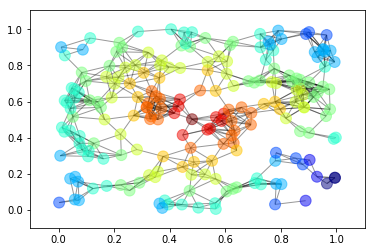

In [25]:
# Plot graph, coloring by path length from central node
p = nx.single_source_shortest_path_length(G, ncenter)
plt.figure()
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_nodes(G,
                      pos,
                      nodelist=list(p.keys()),
                      node_size=120,alpha=0.5,
                      node_color=list(p.values()),
                      cmap=plt.cm.jet_r)
plt.show()

#### Cloud Computing
Library: [Wakar](https://www.wakari.io/)
See also 
- [Amazon Elastic Compute Cloud](http://aws.amazon.com/ec2/)
- [The Google App Engine (Python, Java, PHP or Go)](https://cloud.google.com/appengine/)
- [Pythonanywhere](https://www.pythonanywhere.com/)
- [Sagemath Cloud](https://cloud.sagemath.com/)

#### Parallel Processing
- [Parallel computing through IPython clusters](http://ipython.org/ipython-doc/stable/parallel/parallel_demos.html)
- [The Starcluster interface to Amazon’s EC2](http://star.mit.edu/cluster/)
- GPU programming through [PyCuda](https://wiki.tiker.net/PyCuda), [PyOpenCL](https://mathema.tician.de/software/pyopencl/), [Theano](http://deeplearning.net/software/theano/) or similar   

#### Other Developments
- [Jupyter](http://jupyter.org/)—Python in your browser with code cells, embedded images, etc.
- [Numba](http://numba.pydata.org/) —Make Python run at the same speed as native machine code! 
- [Blaze](http://blaze.pydata.org/) —a generalization of NumPy 
- [PyTables](http://www.pytables.org/)— manage large data sets 
- [CVXPY](https://github.com/cvxgrp/cvxpy) — convex optimization in Python 

## 1.2 [Setting up Your Python Environment](https://lectures.quantecon.org/py/getting_started.html)
### 1.2.1 Overview
### 1.2.2 First Steps Anaconda
### 1.2.3 Jupyter
#### A Test Program

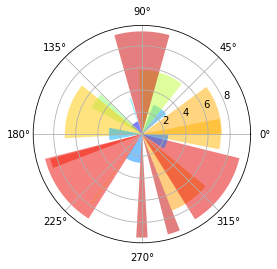

In [26]:
import numpy as np
import matplotlib.pyplot as plt

N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint = False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.5)
plt.show()

In [27]:
np.random?

In [28]:
np.                    # tab

SyntaxError: invalid syntax (<ipython-input-28-957d27ea2739>, line 1)

### 1.2.4 Additional Software
#### Installing QuantEcon.py
`
pip install quantecon
`
#### Method 1: Copy and Paste
#### Method 2: Run
- pwd asks Jupyter to show the PWD (or %pwd — see the comment about automagic above)
  – This is where Jupyter is going to look for files to run  
  – Your output will look a bit different depending on your OS
- ls asks Jupyter to list files in the PWD (or %ls)  
  – Note that test.py is there (on our computer, because we saved it there earlier)
- cat test.py asks Jupyter to print the contents of test.py (or !type test.py onWindows)
- run test.py runs the file and prints any output

### 1.2.5 Alternatives
ipython blah blah

### 1.2.6 Exercises

## [1.3 An Introductory Example](https://lectures.quantecon.org/py/python_by_example.html)

### 1.3.1 Overview

### 1.3.2 The Task: Plotting a White Noise Process

### 1.3.3 Version 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(100)
plt.plot(x)
plt.show()

In [ ]:
import numpy as np
np.sqrt(4)

In [ ]:
import numpy
numpy.sqrt(4)

In [ ]:
from numpy import sqrt
sqrt(4)

### 1.3.4 Alternative Versions
#### A Version with a For Loop

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ts_length = 100
_values = []
 
for i in range(ts_length):
    e = np.random.randn()
    _values.append(e)

plt.plot(_values, 'b-')     #'b-':line type
plt.show()

#### Lists

In [ ]:
x = [10, 'foo', False]     # We can include heterogeneous data inside a list
type(x)

In [29]:
x

x

In [30]:
x.append(2.5)
x

AttributeError: 'Symbol' object has no attribute 'append'

In [ ]:
x.pop()

In [ ]:
x

In [31]:
x[0]

TypeError: 'Symbol' object does not support indexing

In [32]:
x[1]

TypeError: 'Symbol' object does not support indexing

#### The For Loop

In [33]:
for i in range(ts_length):
    e = np.random.randn()
    _values.append(e)

NameError: name 'ts_length' is not defined

In [34]:
animals = ['dog', 'cat', 'bird']
for animal in animals:
    print("The plural of " + animal + " is " + animal + "s")

The plural of dog is dogs
The plural of cat is cats
The plural of bird is birds


`
for variable_name in sequence:  
    <code block>
`   
#### Code Blocks and Indentation

`
for i in range(10):
if x > y:
while x < 100:
etc., etc.
`

#### While Loops

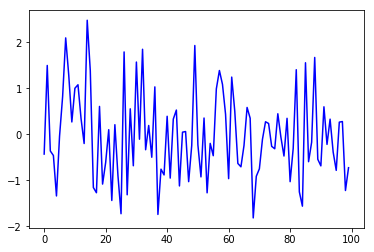

In [35]:
import numpy as np
import matplotlib.pyplot as plt

ts_length = 100
_values = []
i = 0
while i < ts_length:
    e = np.random.randn()
    _values.append(e)
    i = i + 1
plt.plot(_values, 'b-')
plt.show()

#### User-Defined Functions

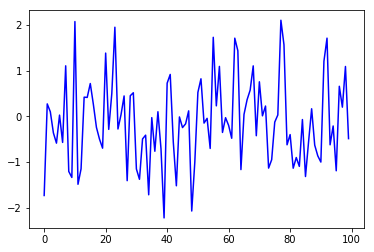

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def generation_data(n):
    _values =[]
    for i in range(n):
        e = np.random.randn()
        _values.append(e)
    return _values
data = generation_data(100)
plt.plot(data,'b-')
plt.show()
        

#### Conditions

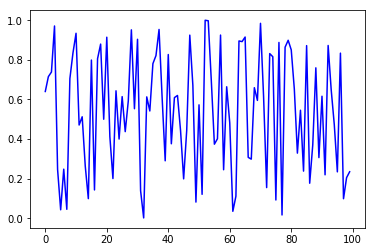

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n, generator_type):
    _values = []
    for i in range(n):
        if generator_type == 'U':
            e = np.random.uniform(0,1)
        else:
            e = np.random.randn()
        _values.append(e)
    return _values

data = generate_data(100, 'U')
plt.plot(data, 'b-')
plt.show()

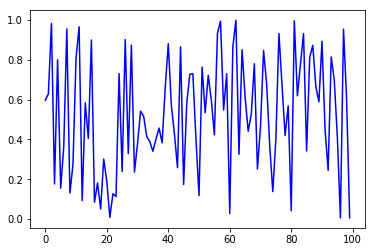

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n, generator_type):
    _values = []
    for i in range(n):
        e = generator_type()
        _values.append(e)
    return _values

data = generate_data(100, np.random.uniform)
plt.plot(data, 'b-')
plt.show()
    

In [39]:
max(7, 2, 4)

7

In [40]:
m = max
m(7, 2, 4)

7

#### List Comprehensions

In [41]:
animals = ['dog', 'cat', 'bird']
plurals = [animal + 's' for animal in animals]
plurals

['dogs', 'cats', 'birds']

In [42]:
range(8)

range(0, 8)

In [43]:
doubles = [2 * x for x in range(8)]
doubles

[0, 2, 4, 6, 8, 10, 12, 14]

将  
`
_values = []  
for i in range(n):  
    e = generator_type()  
    _values.append(e)    
`  
简化为  
`
_values = [generator_type() for i in range(n)]  
`

### 1.3.5 Exercises
#### Exercise 1
n!

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def factorial(n):
    e = 2
    _values = 1
    while e<n+1:
        _values = _values * e
        e = e + 1
    return _values
factorial(10)

3628800

In [45]:
def factorial(n):
    k = 1
    for i in range(n):
        k = k * (i + 1)
    return k
factorial(10)

3628800

#### Exercise 2
binomial random variable Y ~ Bin(n, p)

In [46]:
from numpy.random import uniform
def binomial_rv(n, p):
    count = 0
    for i in range(n):
        U = uniform(0,1)
        if U < p:
            count = count + 1
    return count
binomial_rv(10,0.5)

4

#### Exercise 3
Compute an approximation to $\pi$ using Monte Carlo.

In [47]:
import numpy as np
n = 1000
count = 0
for i in range(n):
    x = np.random.uniform()
    y = np.random.uniform()
    r = np.sqrt((x - 0.5)**2 + (y - 0.5)**2) 
    if r < 0.5:
        count += 1
count*4/n

3.088

In [48]:
import numpy as np

n = 100000

count = 0
for i in range(n):
    u, v = np.random.uniform(), np.random.uniform()
    d = np.sqrt((u - 0.5)**2 + (v - 0.5)**2)
    if d < 0.5:
        count += 1

area_estimate = count / n

print(area_estimate * 4)  # dividing by radius**2

3.14088


#### Exercise 4

In [49]:
from numpy.random import uniform
_values = []
for i in range(10):
    a = uniform()
    if a >= 0.5:
        b = 1
    else:
        b = 0
    _values.append(b)
_values

[1, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [50]:
count = 0
for i in range(0,9):
    if _values[i:i+3] == [1,1,1]:
        count = count + 1
if count>=1:
    print('pay one dollar')

In [51]:
from numpy.random import uniform
payoff = 0
count = 0
for i in range(10):
    U = uniform()
    count = count + 1 if U < 0.5 else 0
    if count == 3:
        payoff = 1
print(payoff)

0


#### Exercise 5
Time series

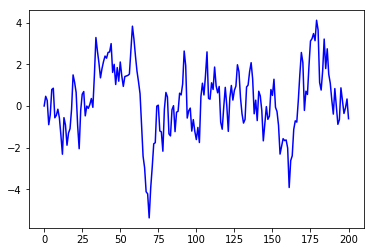

In [52]:
import numpy as np
import matplotlib.pyplot as plt
alpha = 0.9
ts_length = 200
current_x = 0

x_values = []
for i in range(ts_length + 1):    #[0,200] 201个数
    x_values.append(current_x)
    current_x = alpha * current_x + np.random.randn()
plt.plot(x_values, 'b-')
plt.show()

#### Exercise 6

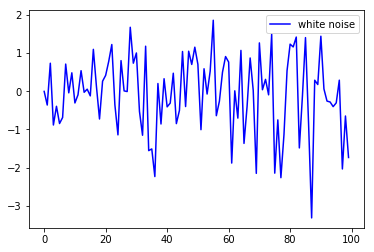

In [53]:
import numpy as np
import matplotlib.pyplot as plt
x = [np.random.randn() for i in range(100)]
plt.plot(x, 'b-', label="white noise")
plt.legend()
plt.show()

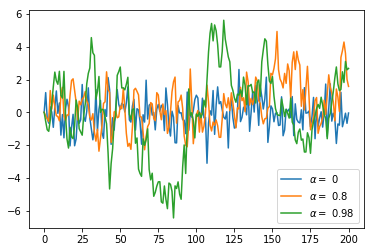

In [54]:
import numpy as np
import matplotlib.pyplot as plt
for alpha in [0,0.8,0.98]:
    ts_length = 200
    current_x = 0
    x_values = []
    for i in range(ts_length + 1):    #[0,200] 201个数
        x_values.append(current_x)
        current_x = alpha * current_x + np.random.randn()
    plt.plot(x_values, label=r'$\alpha =$ ' + str(alpha))
plt.legend()
plt.show()


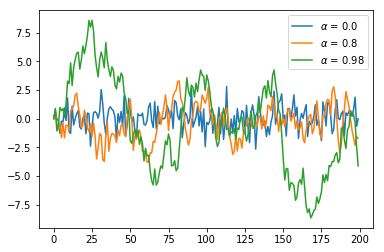

In [55]:
alphas = [0.0, 0.8, 0.98]
ts_length = 200
for alpha in alphas:
    x_values = []
    current_x = 0
    for i in range(ts_length):
        x_values.append(current_x)
        current_x = alpha * current_x + np.random.randn()
    plt.plot(x_values, label=r'$\alpha$ = ' + str(alpha))
plt.legend()
plt.show()


## 1.4 [Python Essentials](https://lectures.quantecon.org/py/python_essentials.html)
### 1.4.1 Overview
### 1.4.2 Data Types
#### Primitive Data Types

In [56]:
x = True
y = 100 < 10 # Python evaluates expression on right and assigns it to y
y

False

In [57]:
type(y)

bool

In [58]:
x + y

1

In [59]:
x * y

0

In [60]:
True + True

2

In [61]:
bools = [True, True, False, True]  # List of Boolean values
sum(bools)

3

In [62]:
a, b = 1, 2
c, d = 2.5, 10.0
type(a)

int

In [63]:
type(c)

float

In [64]:
1 / 2

0.5

In [65]:
1 // 2

0

In [66]:
x = complex(1, 2)
y = complex(2, 1)
x * y

5j

#### Containers

In [67]:
x = ('a', 'b')  # Round brackets instead of the square brackets
x = 'a', 'b'   # Or no brackets at all---the meaning is identical
x

('a', 'b')

In [68]:
type(x)         # 数组

tuple

In [69]:
x = [1, 2]   # List
x[0] = 10 # Now x = [10, 2]

In [70]:
x = (1, 2)   # tuple cant be changed
x[0] = 10    

TypeError: 'tuple' object does not support item assignment

In [71]:
integers = (10, 20, 30)
x, y, z = integers
x

10

In [72]:
y

20

#### Slice Notation

In [73]:
a = [2, 4, 6, 8]
a[1:]

[4, 6, 8]

In [74]:
a[1:3]

[4, 6]

In [75]:
a[-2:]

[6, 8]

In [76]:
s = 'foobar'
s[-3:] # Select the last three elements

'bar'

#### Sets and Dictionaries

In [77]:
d = {'name': 'Frodo', 'age': 33}
type(d)

dict

In [78]:
d['age']

33

In [79]:
s1 = {'a', 'b'}
type(s1)

set

In [80]:
s2 = {'b', 'c'}
s1.issubset(s2)

False

In [81]:
s1.intersection(s2)

{'b'}

In [82]:
s3 = set(('foo', 'bar', 'foo'))   # Unique elements only
s3

{'bar', 'foo'}

### 1.4.3 Imports

In [83]:
import math
math.sqrt(4)

2.0

In [84]:
from math import *
sqrt(4)

2.0

### 1.4.4 Input and Output

In [85]:
f = open('newfile.txt', 'w') # Open 'newfile.txt' for writing
f.write('Testing\n') # Here '\n' means new line
f.write('Testing again')
f.close()

In [86]:
%pwd

'C:\\Users\\YAN\\Desktop\\QuantEcon'

In [87]:
f = open('newfile.txt', 'r')
out = f.read()
out

'Testing\nTesting again'

In [88]:
print(out)

Testing
Testing again


In [89]:
f = open('C:\\Users\\YAN\\Desktop\\P\\newfile.txt', 'r')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\YAN\\Desktop\\P\\newfile.txt'

### 1.4.5 Iterating
#### Looping over Different Objects

In [90]:
%%file us_cities.txt
new york: 8244910
los angeles: 3819702
chicago: 2707120
houston: 2145146
philadelphia: 1536471
phoenix: 1469471
san antonio: 1359758
san diego: 1326179
dallas: 1223229

Overwriting us_cities.txt


In [91]:
data_file = open('us_cities.txt', 'r')
for line in data_file:
    city,population = line.split(':')             # Tuple unpacking
    city = city.title()                           # Capitalize city names
    population = '{0:,}'.format(int(population))  # Add commas to numbers
    print(city.ljust(15) + population)            # ljust是python中用于将字符串填充至指定长度的内置函数
data_file.close()

New York       8,244,910
Los Angeles    3,819,702
Chicago        2,707,120
Houston        2,145,146
Philadelphia   1,536,471
Phoenix        1,469,471
San Antonio    1,359,758
San Diego      1,326,179
Dallas         1,223,229


#### Looping without Indices

In [92]:
x_values = [1,2,3] #Some iterable x    
for x in x_values:
    print(x * x)

1
4
9


In [93]:
for i in range(len(x_values)):
    print(x_values[i] * x_values[i])

1
4
9


In [94]:
# One is zip(), which is used for stepping through pairs from two sequences
countries = ('Japan', 'Korea', 'China')
cities = ('Tokyo', 'Seoul', 'Beijing')
for country, city in zip(countries, cities):
    print('The capital of {0} is {1}'.format(country, city))

The capital of Japan is Tokyo
The capital of Korea is Seoul
The capital of China is Beijing


In [95]:
names = ['Tom', 'John']
marks = ['E', 'F']
dict(zip(names, marks))

{'John': 'F', 'Tom': 'E'}

If we actually need the index from a list, one option is to use enumerate()

In [96]:
letter_list = ['a', 'b', 'c']
for index, letter in enumerate(letter_list):
    print("letter_list[{0}] = '{1}'".format(index, letter))

letter_list[0] = 'a'
letter_list[1] = 'b'
letter_list[2] = 'c'


### 1.4.6 Comparisons and Logical Operators
#### Comparisons

In [97]:
x, y = 1, 2
x < y

True

In [98]:
x > y

False

In [99]:
1 < 2 < 3

True

In [100]:
1 <= 2 <= 3

True

In [101]:
x = 1  # Assignment
x == 2 # Comparison

False

In [102]:
1 != 2

True

In [103]:
x = 'yes' if 42 else 'no'
x

'yes'

In [104]:
x = 'yes' if [] else 'no'
x

'no'

The rule is:  
- Expressions that evaluate to zero, empty sequences or containers (strings, lists, etc.) and None are all equivalent to False  
  – for example, [] and () are equivalent to False in an if clause  
- All other values are equivalent to True  
  – for example, 42 is equivalent to True in an if clause
  
#### Combining Expressions

In [105]:
1 < 2 and 'f' in 'foo'

True

In [106]:
1 < 2 and 'g' in 'foo'

False

In [107]:
1 < 2 or 'g' in 'foo'

True

In [108]:
not True

False

In [109]:
not not True

True

Remember
- P and Q is True if both are True, else False
- P or Q is False if both are False, else True

### 1.4.7 More Functions

In [110]:
max(19, 20)

20

In [111]:
range(4) # in python3 this returns a range iterator object

range(0, 4)

In [112]:
list(range(4)) # will evaluate the range iterator and create a list

[0, 1, 2, 3]

In [113]:
str(22)

'22'

In [114]:
type(22)

int

In [115]:
bools = False, True, True
all(bools) # True if all are True and False otherwise

False

In [116]:
any(bools) # False if all are False and True otherwise

True

#### The Flexibility of Python Functions 

In [117]:
def f(x):
    if x < 0:
        return 'negative'
    return 'nonnegative'

#### Docstrings

In [118]:
# Filename: temp.py
def f(x):
    """
    This function squares its argument
    """
    return x**2

In [119]:
f(50)

2500

In [120]:
f?

In [121]:
f??

#### One-Line Functions: lambda

In [122]:
def f(x):
    return x**3

In [123]:
f = lambda x: x**3

calculating $\int_0^2{x^3dx}$  
The syntax of the quad function is `quad(f, a, b)` where f is a function and a and b are numbers

In [124]:
from scipy.integrate import quad
quad(lambda x:x**3, 0, 2)

(4.0, 4.440892098500626e-14)

#### Keyword Arguments

In [125]:
def f(x, coefficients=(1, 1)):
    a, b = coefficients
    return a + b * x

In [126]:
f(2, coefficients=(0, 0))

0

In [127]:
f(2)  # Use default values (1, 1)

3

### 1.4.8 Coding Style and PEP8

### 1.4.9 Exercises
#### Exercise 1

In [128]:
x_vals = [1, 2, 3]
y_vals = [1, 1, 1]
sum([x * y for x, y in zip(x_vals, y_vals)])

6

In [129]:
sum([x % 2 == 0 for x in range(100)])

50

In [130]:
pairs = ((2, 5), (4, 2), (9, 8), (12, 10))
sum([x % 2 == 0 and y % 2 == 0 for x, y in pairs])

2

#### Exercise 2

In [131]:
def p(x,coeff):
    _values = []
    for i in enumerate(coeff):
        e = x ** i
        _values.append(e*coeff[i])
    return sum(_values) 

In [132]:
p(1,[1,2,3])

TypeError: unsupported operand type(s) for ** or pow(): 'int' and 'tuple'

In [133]:
def p(x, coeff):
    return sum(a * x**i for i, a in enumerate(coeff))

In [134]:
p(1,[1,2])

3

#### Exercise 3

In [135]:
def f(string):
    count = 0
    for letter in string:
        if letter == letter.upper() and letter.isalpha():  # isalpha 判断是否是英文字母
            count +=1
    return count
f('L`Arc En Ciel')

4

#### Exercise 4

In [136]:
def comp(seq_a, seq_b):
    for i in enumerate(seq_a):
        if seq_a[i]==seq_b[i]:
            return "True"
        else:
            return "False"

In [137]:
print(comp([1,2,3],[1,2,3]))

TypeError: list indices must be integers or slices, not tuple

In [138]:
def f(seq_a, seq_b):
    is_subset = True
    for a in seq_a:
        if a not in seq_b:
            is_subset = False
    return is_subset
# == test == #
print(f([1, 2], [1, 2, 3]))
print(f([1, 2, 3], [1, 2]))
print(f("L`Arc En Ciel","L`Arc En Ciel R"))

True
False
True


In [139]:
def f(seq_a, seq_b):
    return set(seq_a).issubset(set(seq_b))

#### Exercise 5

In [140]:
def linapprox(f, a, b, n, x):

   # Evaluates the piecewise linear interpolant of f at x on the interval [a, b], with n evenly spaced grid points.
   # Parameters
   # ==========
   #     f : function
   #         The function to approximate
   #     x, a, b : scalars (floats or integers)
   #         Evaluation point and endpoints, with a <= x <= b
   #     n : integer
   #         Number of grid points
   # Returns
   # ========= 
   #     A float. The interpolant evaluated at x
   
    length_of_interval = b - a 
    num_subintervals = n - 1
    step = length_of_interval / num_subintervals

    # === find first grid point larger than x === #
    point = a
    while point <= x: 
        point += step
    # === x must lie between the gridpoints (point - step) and point === #
    u, v = point - step, point
    return f(u) + (x - u) * (f(v) - f(u)) / (v - u)



## 1.5 [NumPy](https://lectures.quantecon.org/py/numpy.html)
### 1.5.1 Overview  
[The official NumPy documentation](https://docs.scipy.org/doc/numpy/reference/)
### 1.5.2 Introduction to NumPy

In [141]:
import numpy as np
x = np.random.uniform(0, 1, size=1000000)
x.mean()

0.49991533841643493

### 1.5.3 NumPy Arrays

To create a NumPy array containing only zeros we use `np.zeros`

In [142]:
import numpy as np
a = np.zeros(3)
a

array([ 0.,  0.,  0.])

In [143]:
type(a)

numpy.ndarray

In [144]:
a = np.zeros(3)
type(a[0])

numpy.float64

In [145]:
a = np.zeros(3, dtype=int)
type(a[0])

numpy.int32

#### Shape and Dimension

Here `z` is a flat array with no dimension — neither row nor column vector

In [146]:
z = np.zeros(10)
z

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

Here the shape tuple has only one element, which is the length of the array (tuples with one element end with a comma)

In [147]:
z.shape

(10,)

In [148]:
z.shape = (10, 1)
z

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [149]:
z = np.zeros(4)
z.shape = (2, 2)
z

array([[ 0.,  0.],
       [ 0.,  0.]])

#### Creating Arrays

Related is `np.empty`, which creates arrays in memory that can later be populated with data. The numbers you see here are garbage values `float64`

In [150]:
z = np.empty(3)
z

array([ 0.,  0.,  0.])

To set up a grid of evenly spaced numbers use `np.linspace`

In [151]:
z = np.linspace(2, 4, 5) # From 2 to 4, with 5 elements

To create an identity matrix(单位矩阵) use either `np.identity` or `np.eye`

In [152]:
z = np.identity(2)
z

array([[ 1.,  0.],
       [ 0.,  1.]])

In addition, NumPy arrays can be created from Python lists, tuples, etc. using `np.array`

In [153]:
z = np.array([10, 20]) # ndarray from Python list
z

array([10, 20])

In [154]:
type(z)

numpy.ndarray

In [155]:
z = np.array((10, 20), dtype=float) # Here 'float' is equivalent to 'np.float64'
z

array([ 10.,  20.])

In [156]:
z = np.array([[1, 2], [3, 4]]) # 2D array from a list of lists
z

array([[1, 2],
       [3, 4]])

In [157]:
na = np.linspace(10, 20, 2) 
na

array([ 10.,  20.])

In [158]:
np.array(na)

array([ 10.,  20.])

In [159]:
np.asarray(na)

array([ 10.,  20.])

In [160]:
na is np.asarray(na)         # Does not copy NumPy arrays

True

In [161]:
na is np.array(na)           # Does make a new copy --- perhaps unnecessarily

False

In [162]:
na == np.array(na)

array([ True,  True], dtype=bool)

In [163]:
print (id(na))

2289394190576


In [164]:
print (id(np.asarray(na)))

2289394190576


In [165]:
print (id(np.array(na)))

2289392288912


`==` 比较操作符：用来比较两个对象是否相等，value做为判断因素；  
`is` 同一性运算符：比较判断两个对象是否相同，id做为判断因素。

#### Array Indexing

In [166]:
z = np.linspace(1,2,5)
z

array([ 1.  ,  1.25,  1.5 ,  1.75,  2.  ])

In [167]:
z[0]

1.0

In [168]:
z[0:2]

array([ 1.  ,  1.25])

In [169]:
z[-1]

2.0

In [170]:
z = np.array([[1,2],[3,4]])
z

array([[1, 2],
       [3, 4]])

In [171]:
z[0,0]

1

In [172]:
z[0,1]

2

In [173]:
z[0:]

array([[1, 2],
       [3, 4]])

In [174]:
z[:,1]

array([2, 4])

In [175]:
z = np.linspace(2, 4, 5)
z

array([ 2. ,  2.5,  3. ,  3.5,  4. ])

In [176]:
indices = np.array((0, 2, 3))    # position
z[indices]

array([ 2. ,  3. ,  3.5])

In [177]:
z

array([ 2. ,  2.5,  3. ,  3.5,  4. ])

In [178]:
d = np.array([0, 1, 1, 0, 0], dtype=bool)
d

array([False,  True,  True, False, False], dtype=bool)

In [179]:
z[d]      #  position

array([ 2.5,  3. ])

In [180]:
z = np.empty(3)                 # clear z ?
z

array([ 2. ,  3. ,  3.5])

In [181]:
z[:] = 42
z

array([ 42.,  42.,  42.])

#### Array Methods

In [182]:
A = np.array((4, 3, 2, 1))
A

array([4, 3, 2, 1])

In [183]:
A.sort() # Sorts A in place
A

array([1, 2, 3, 4])

In [184]:
A.sum()

10

In [185]:
A.mean()

2.5

In [186]:
A.max()

4

In [187]:
A.argmax()    # Returns the index of the maximal element

3

In [188]:
A.cumsum()    # Cumulative sum of the elements of A

array([ 1,  3,  6, 10], dtype=int32)

In [189]:
A.cumprod()   # Cumulative product of the elements of A

array([ 1,  2,  6, 24], dtype=int32)

In [190]:
A.var() # Variance

1.25

In [191]:
A.std() # Standard deviation

1.1180339887498949

In [192]:
A.shape = (2, 2)
A.T                    # Equivalent to A.transpose()

array([[1, 3],
       [2, 4]])

In [193]:
z = np.linspace(2, 4, 5)                # [2,4] with 5 grids
z

array([ 2. ,  2.5,  3. ,  3.5,  4. ])

In [194]:
z.searchsorted(2.2)    
#  If z is a nondecreasing array, then z.searchsorted(a) returns the index of the first element of z that is >= a
# 大于等于2.2的最小的数的位置

1

In [195]:
z.searchsorted(2.5)

1

In [196]:
z.searchsorted(2.6)

2

In [197]:
a = np.array((4, 3, 2, 1))

In [198]:
np.sum(a)

10

In [199]:
np.mean(a)

2.5

### 1.5.4 Operations on Arrays
#### Algebraic Operations

In [200]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])
a + b

array([ 6,  8, 10, 12])

In [201]:
a * b

array([ 5, 12, 21, 32])

In [202]:
a + 10

array([11, 12, 13, 14])

In [203]:
a * 10

array([10, 20, 30, 40])

In [204]:
A = np.ones((2, 2))                  #  依据给定形状和类型(shape[, dtype, order])返回一个新的元素全部为1的数组  type of matrix（2,2）
B = np.ones((2, 2))
A + B

array([[ 2.,  2.],
       [ 2.,  2.]])

In [205]:
A + 10

array([[ 11.,  11.],
       [ 11.,  11.]])

In [206]:
A * B

array([[ 1.,  1.],
       [ 1.,  1.]])

#### Matrix Multiplication

In [207]:
import numpy as np
A = np.ones((2, 2))
B = np.ones((2, 2))
A @ B

array([[ 2.,  2.],
       [ 2.,  2.]])

In [208]:
A = np.array((1, 2))
B = np.array((10, 20))
A @ B

50

In [209]:
A = np.array(((1, 2), (3, 4)))
A

array([[1, 2],
       [3, 4]])

In [210]:
A @ (0, 1)

array([2, 4])

#### Mutability and Copying Arrays

In [211]:
a = np.array([42, 44])
a

array([42, 44])

In [212]:
a[-1] = 0  # Change last element to 0
a

array([42,  0])

In [213]:
a = np.random.randn(3)
a

array([-0.42816389,  0.05548014, -2.07160367])

What’s happened is that we have changed a by changing b

In [214]:
b = a
b[0] = 0.0
a

array([ 0.        ,  0.05548014, -2.07160367])

#### Making Copies

It is of course possible to make b an independent copy of a when required

With recent versions of NumPy, this is best done using `np.copyto`

In [215]:
a = np.random.randn(3)
a

array([ 0.45385071,  0.38643551,  0.87494017])

In [216]:
b = np.empty_like(a)  # empty array with same shape as a
np.copyto(b, a)  # copy to b from a
b

array([ 0.45385071,  0.38643551,  0.87494017])

In [217]:
b[:] = 1
b

array([ 1.,  1.,  1.])

In [218]:
a

array([ 0.45385071,  0.38643551,  0.87494017])

### 1.5.5 Additional Functionality
#### Vectorized Functions

In [219]:
z = np.array([1, 2, 3])
np.sin(z)

array([ 0.84147098,  0.90929743,  0.14112001])

In [220]:
n = len(z)
y = np.empty(n)
for i in range(n):
    y[i] = np.sin(z[i])

In [221]:
z

array([1, 2, 3])

In [222]:
(1 / np.sqrt(2 * np.pi)) * np.exp(- 0.5 * z**2)

array([ 0.24197072,  0.05399097,  0.00443185])

In [223]:
def f(x):
    return 1 if x > 0 else 0

The NumPy function `np.where` provides a vectorized alternative:

In [224]:
import numpy as np

x = np.random.randn(4)
x

array([-1.23022854, -2.20836286,  0.34551891,  1.10724386])

In [225]:
np.where(x > 0, 1, 0)  # Insert 1 if x > 0 true, otherwise 0

array([0, 0, 1, 1])

You can also use `np.vectorize` to vectorize a given function

In [226]:
def f(x): return 1 if x > 0 else 0

f = np.vectorize(f)
f(x)                # Passing the same vector x as in the previous example

array([0, 0, 1, 1])

#### Comparisons

In [227]:
z = np.array([2, 3])
y = np.array([2, 3])
z == y

array([ True,  True], dtype=bool)

In [228]:
y[0] = 5
z == y

array([False,  True], dtype=bool)

In [229]:
z != y

array([ True, False], dtype=bool)

In [230]:
z = np.linspace(0, 10, 5)
z

array([  0. ,   2.5,   5. ,   7.5,  10. ])

In [231]:
z > 3

array([False, False,  True,  True,  True], dtype=bool)

In [232]:
b = z > 3
b

array([False, False,  True,  True,  True], dtype=bool)

In [233]:
z[b]

array([  5. ,   7.5,  10. ])

In [234]:
z[z > 3]

array([  5. ,   7.5,  10. ])

#### Subpackages

We’ve already seen how we can generate random variables using `np.random`

In [235]:
z = np.random.randn(10000)                    # Generate standard normals
y = np.random.binomial(10, 0.5, size=1000)    # 1,000 draws from Bin(10, 0.5)
y.mean()

4.9870000000000001

Another commonly used subpackage is `np.linalg`
- `np.linalg.inv()`：矩阵求逆
- `np.linalg.det()`：矩阵求行列式（标量）

In [236]:
A = np.array([[1, 2], [3, 4]])

np.linalg.det(A)           # Compute the determinant

-2.0000000000000004

In [237]:
np.linalg.inv(A)           # Compute the inverse

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

### 1.5.6 Exercises
#### Exercise 1

In [238]:
import numpy as np
import matplotlib.pyplot as plt

In [239]:
def p(x, coef):
    X = np.empty(len(coef))
    X[0] = 1
    X[1:] = x
    y = np.cumprod(X)   # y = [1, x, x**2,...]
    return coef @ y

In [240]:
coef = np.ones(3)
print(coef)
print(p(1, coef))
# For comparison
q = np.poly1d(coef)
print(q(1))

[ 1.  1.  1.]
3.0
3.0


#### Exercise 2

In [241]:
from numpy import cumsum
from numpy.random import uniform

class discreteRV:
    """
    Generates an array of draws from a discrete random variable with vector of
    probabilities given by q.
    """

    def __init__(self, q):
        """
        The argument q is a NumPy array, or array like, nonnegative and sums
        to 1
        """
        self.q = q
        self.Q = cumsum(q)

    def draw(self, k=1):
        """
        Returns k draws from q. For each such draw, the value i is returned
        with probability q[i].
        """
        return self.Q.searchsorted(uniform(0, 1, size=k))

In [242]:
q = (0.1, 0.9)
d = discreteRV(q)
d.q = (0.5, 0.5)

#### Exercise 3

In [243]:
"""
Modifies ecdf.py from QuantEcon to add in a plot method

"""

class ECDF:
    """
    One-dimensional empirical distribution function given a vector of
    observations.

    Parameters
    ----------
    observations : array_like
        An array of observations

    Attributes
    ----------
    observations : array_like
        An array of observations

    """

    def __init__(self, observations):
        self.observations = np.asarray(observations)

    def __call__(self, x):
        """
        Evaluates the ecdf at x

        Parameters
        ----------
        x : scalar(float)
            The x at which the ecdf is evaluated

        Returns
        -------
        scalar(float)
            Fraction of the sample less than x

        """
        return np.mean(self.observations <= x)

    def plot(self, a=None, b=None):
        """
        Plot the ecdf on the interval [a, b].

        Parameters
        ----------
        a : scalar(float), optional(default=None)
            Lower end point of the plot interval
        b : scalar(float), optional(default=None)
            Upper end point of the plot interval

        """

        # === choose reasonable interval if [a, b] not specified === #
        if a is None:
            a = self.observations.min() - self.observations.std()
        if b is None:
            b = self.observations.max() + self.observations.std()

        # === generate plot === #
        x_vals = np.linspace(a, b, num=100)
        f = np.vectorize(self.__call__)
        plt.plot(x_vals, f(x_vals))
        plt.show()

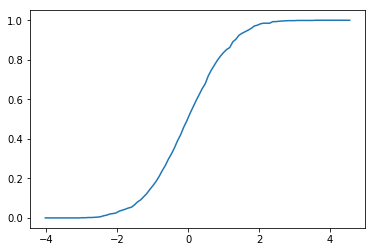

In [244]:
X = np.random.randn(1000)
F = ECDF(X)
F.plot()

## 1.6 [Matplotlib](https://lectures.quantecon.org/py/matplotlib.html)
### 1.6.1 Overview
### 1.6.2 The MATLAB-Style API

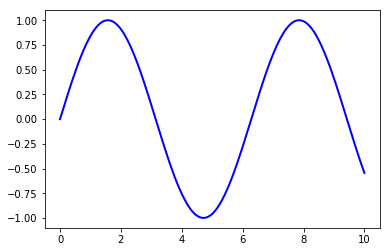

In [245]:
from pylab import *  # Deprecated
x = linspace(0, 10, 200)
y = sin(x)
plot(x, y, 'b-', linewidth=2)
show()

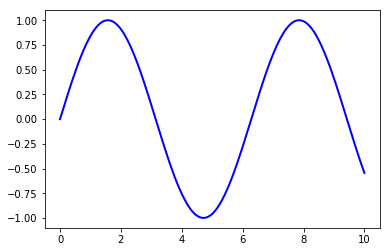

In [246]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 10, 200)
y = np.sin(x)
plt.plot(x, y, 'b-', linewidth=2)
plt.show()

### 1.6.3 The Object-Oriented API

Incidentally, regarding the above lines of code,  
- the form of the import statement import `matplotlib.pyplot` as plt is standard  
- Here the call `fig, ax = plt.subplots()` returns a pair, where  
    `fig` is a `Figure` instance—like a blank canvas  
   ` ax` is an `AxesSubplot` instance—think of a frame for plotting in
- The `plot()` function is actually a method of `ax`

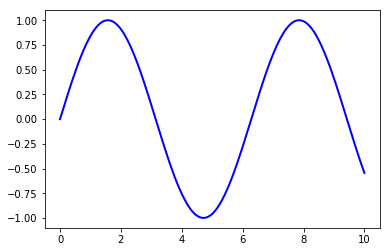

In [247]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
x = np.linspace(0, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'b-', linewidth=2)
plt.show()

#### Tweaks

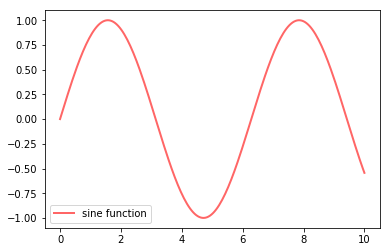

In [248]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
x = np.linspace(0, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend()
plt.show()

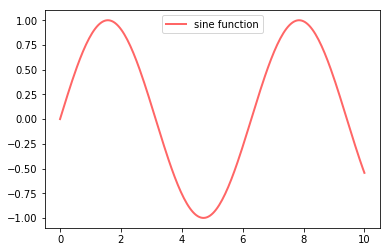

In [249]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
x = np.linspace(0, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='upper center')
plt.show()

The `r` in front of the label string tells Python that this is a raw string

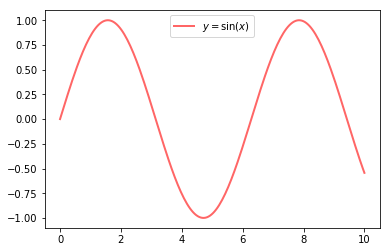

In [250]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
x = np.linspace(0, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label=r'$y=\sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
plt.show()

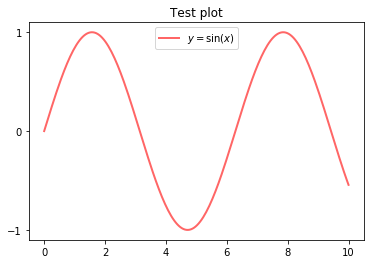

In [251]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
x = np.linspace(0, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label=r'$y=\sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
ax.set_yticks([-1, 0, 1])
ax.set_title('Test plot')
plt.show()

### 1.6.4 More Features
#### Multiple Plots on One Axis

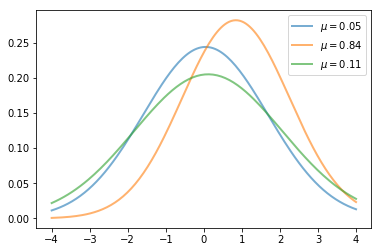

In [252]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from random import uniform

fig, ax = plt.subplots()
x = np.linspace(-4, 4, 150)
for i in range(3):
    m, s = uniform(-1, 1), uniform(1, 2)
    y = norm.pdf(x, loc=m, scale=s)       # loc: mean  scale: deviation
    current_label = r'$\mu = {0:.2f}$'.format(m)
    ax.plot(x, y, linewidth=2, alpha=0.6, label=current_label)
ax.legend()
plt.show()

#### Multiple Subplots

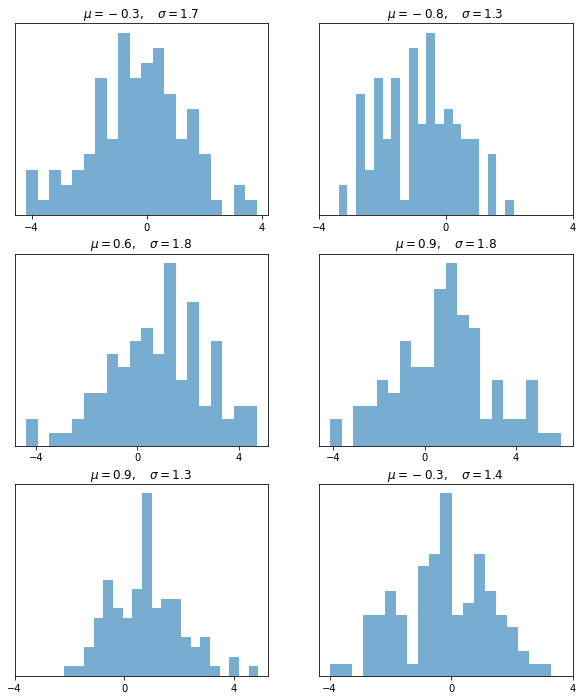

In [253]:
import matplotlib.pyplot as plt
from scipy.stats import norm         # 正态分布
from random import uniform
num_rows, num_cols = 3, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 12))
for i in range(num_rows):
    for j in range(num_cols):
        m, s = uniform(-1, 1), uniform(1, 2)
        x = norm.rvs(loc=m, scale=s, size=100)
        axes[i, j].hist(x, alpha=0.6, bins=20)
        t = r'$\mu = {0:.1f}, \quad \sigma = {1:.1f}$'.format(m, s)
        axes[i, j].set_title(t)
        axes[i, j].set_xticks([-4, 0, 4])
        axes[i, j].set_yticks([])
plt.show()

In fact the preceding figure was generated by the code above preceded by the following three lines

In [254]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

#### 3D Plots
[more examples](http://blog.csdn.net/guduruyu/article/details/78050268)  
[details](http://python.jobbole.com/87471/)

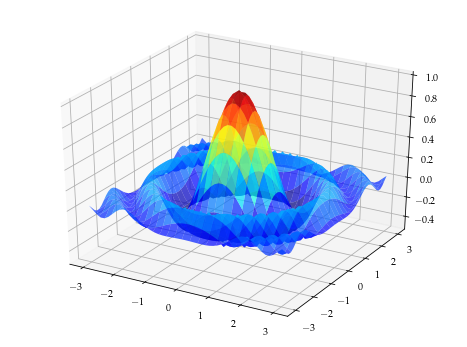

In [255]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
from matplotlib import cm


def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

xgrid = np.linspace(-3, 3, 50)
ygrid = xgrid
x, y = np.meshgrid(xgrid, ygrid)  # 绘制三维图形,首先,需要XY平面的网格数据,这就是meshgrid函数所实现的内容

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')  #加入图像
ax.plot_surface(x,
                y,
                f(x, y),
                rstride=2, cstride=2,  #rstride和cstride是两个方向上的采样，越小越精细，lw是线宽
                cmap=cm.jet,
                alpha=0.7,
                linewidth=0.25)
ax.set_zlim(-0.5, 1.0)
plt.show()

#### A Customizing Function

The custom `subplots` function
1. calls the standard `plt.subplots` function internally to generate the `fig, ax` pair,
2. makes the desired customizations to `ax`, and
3. passes the `fig, ax` pair back to the calling code

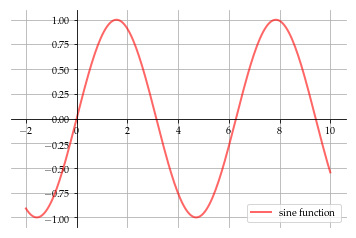

In [256]:
import matplotlib.pyplot as plt
import numpy as np


def subplots():
    "Custom subplots with axes throught the origin"
    fig, ax = plt.subplots()

    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    ax.grid()
    return fig, ax


fig, ax = subplots()  # Call the local version, not plt.subplots()
x = np.linspace(-2, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='lower right')
plt.show()

### 1.6.5 Further Reading
- The [Matplotlib gallery](http://matplotlib.org/gallery.html) provides many examples
- A nice [Matplotlib tutorial](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html) by Nicolas Rougier, Mike Muller and Gael Varoquaux
- [mpltools](http://tonysyu.github.io/mpltools/index.html) allows easy switching between plot styles
- [Seaborn](https://github.com/mwaskom/seaborn) facilitates common statistics plots in Matplotlib

## 1.7 SciPy
SciPy builds on top of NumPy to provide common tools for scientific programming, such as

- [linear algebra](http://docs.scipy.org/doc/scipy/reference/linalg.html)
- [numerical integration](http://docs.scipy.org/doc/scipy/reference/integrate.html)
- [interpolation](http://docs.scipy.org/doc/scipy/reference/interpolate.html)
- [optimization](http://docs.scipy.org/doc/scipy/reference/optimize.html)
- [distributions and random number generation](http://docs.scipy.org/doc/scipy/reference/stats.html)
- [signal processing](http://docs.scipy.org/doc/scipy/reference/signal.html)
- etc., etc

### 1.7.1 SciPy versus NumPy

In [257]:
# Import numpy symbols to scipy name space
import numpy as _num
linalg = None
from numpy import *
from numpy.random import rand, randn
from numpy.fft import fft, ifft
from numpy.lib.scimath import *

__all__  = []
__all__ += _num.__all__
__all__ += ['randn', 'rand', 'fft', 'ifft']

del _num
# Remove the linalg imported from numpy so that the scipy.linalg package can be imported.
del linalg
__all__.remove('linalg')

In [258]:
import numpy as np

a = np.identity(3)

What is useful in SciPy is the functionality in its subpackages

- `scipy.optimize`, `scipy.integrate`, `scipy.stats`, etc.

In [259]:
from scipy.integrate import quad
from scipy.optimize import brentq
# etc

### 1.7.2 Statistics
The `scipy.stats` subpackage supplies
- numerous random variable objects (densities, cumulative distributions, random sampling, etc.)
- some estimation procedures
- some statistical tests

#### Random Variables and Distributions

In [260]:
import numpy as np

np.random.beta(5, 5, size=3)

array([ 0.64126024,  0.66413968,  0.66939683])

This generates a draw from the distribution below when `a, b = 5, 5`
$f(x; a, b) = \frac{x^{(a - 1)} (1 - x)^{(b - 1)}}{\int_0^1 u^{(a - 1)} u^{(b - 1)} du}\qquad (0 \leq x \leq 1)$

In this code we created a so-called `rv_frozen object`, via the call `q = beta(5, 5)`

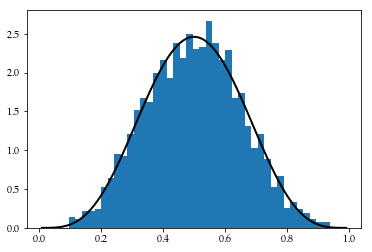

In [261]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

q = beta(5, 5)      # Beta(a, b), with a = b = 5
obs = q.rvs(2000)   # 2000 observations
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, normed=True)
ax.plot(grid, q.pdf(grid), 'k-', linewidth=2)
plt.show()

In [262]:
q.cdf(0.4)             # Cumulative distribution function

0.26656768000000003

In [263]:
q.pdf(0.4)      # Density function

2.0901888000000013

In [264]:
q.ppf(0.8)      # Quantile (inverse cdf) function

0.63391348346427079

In [265]:
q.mean()

0.5

The general syntax for creating these objects is

`identifier = scipy.stats.distribution_name(shape_parameters)`

There are also two keyword arguments, `loc` and `scale`, which following our example above, are called as

`identifier = scipy.stats.distribution_name(shape_parameters, loc=c, scale=d)`

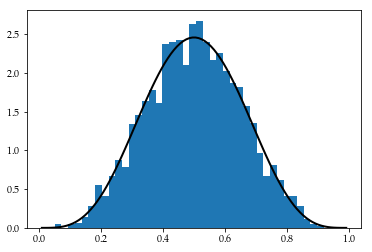

In [266]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

obs = beta.rvs(5, 5, size=2000)
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, normed=True)
ax.plot(grid, beta.pdf(grid, 5, 5), 'k-', linewidth=2)
plt.show()

#### Other Goodies in scipy.stats
There are a variety statistical functions in `scipy.stats`

For example, `scipy.stats.linregress` implements simple linear regression

In [267]:
from scipy.stats import linregress

x = np.random.randn(200)
y = 2 * x + 0.1 * np.random.randn(200)
gradient, intercept, r_value, p_value, std_err = linregress(x, y)
gradient, intercept

(1.9959768485393077, -0.0059088486958540978)

### 1.7.3 Roots and Fixed Points
<p>A <em>root</em> of a real function <em>f</em> on <span class="math">[a,b]</span> is an $x \in [a, b]$ such that $f(x)=0$
<p>For example, if we plot the function</p>

$f(x) = \sin(4 (x - 1/4)) + x + x^{20} - 1$
with $x \in [0,1]$ we get</p>
<div class="figure" id="root-fig">
<a class="reference internal image-reference" href="https://lectures.quantecon.org/_images/root.png"><img alt="https://lectures.quantecon.org/_images/root.png" src="https://lectures.quantecon.org/_images/root.png" style="width: 568.4px; height: 428.4px;" /></a>
</div>
<p>The unique root is approximately 0.408</p>
<p>Let&#8217;s consider some numerical techniques for finding roots</p>
#### Bisection 二分法  
It works for all sufficiently well behaved increasing continuous functions with $f(a)<0<f(b)$

In [268]:
def bisect(f, a, b, tol=10e-5):
    """
    Implements the bisection root finding algorithm, assuming that f is a
    real-valued function on [a, b] satisfying f(a) < 0 < f(b).
    """
    lower, upper = a, b

    while upper - lower > tol:
        middle = 0.5 * (upper + lower)
        # === if root is between lower and middle === #
        if f(middle) > 0:  
            lower, upper = lower, middle
        # === if root is between middle and upper  === #
        else:              
            lower, upper = middle, upper

    return 0.5 * (upper + lower)

In [269]:
from scipy.optimize import bisect

f = lambda x: np.sin(4 * (x - 0.25)) + x + x**20 - 1
bisect(f, 0, 1)

0.4082935042806639

#### The Newton-Raphson Method （寻根算法）

In [270]:
from scipy.optimize import newton

newton(f, 0.2)   # Start the search at initial condition x = 0.2

0.40829350427935679

In [271]:
newton(f, 0.7)   # Start the search at x = 0.7 instead

0.70017000000002816

In [272]:
%timeit bisect(f, 0, 1)

10000 loops, best of 3: 79.2 µs per loop


In [273]:
%timeit newton(f, 0.2)

10000 loops, best of 3: 23.8 µs per loop


#### Hybrid Methods
In scipy.optimize, the function `brentq` is such a hybrid method, and a good default

In [274]:
brentq(f, 0, 1)

0.40829350427936706

In [275]:
%timeit brentq(f, 0, 1)

The slowest run took 4.19 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 18.9 µs per loop


#### Multivariate Root Finding
Use `scipy.optimize.fsolve`, a wrapper for a hybrid method in MINPACK

#### Fixed Points

In [276]:
from scipy.optimize import fixed_point

fixed_point(lambda x: x**2, 10.0)  # 10.0 is an initial guess

array(1.0)

### 1.7.4 Optimization

In [277]:
# Most numerical packages provide only functions for minimization
from scipy.optimize import fminbound

fminbound(lambda x: x**2, -1, 2)  # Search in [-1, 2]

0.0

#### Multivariate Optimization
Multivariate local optimizers include `minimize`, `fmin`, `fmin_powell`, `fmin_cg`, `fmin_bfgs`, and `fmin_ncg`

Constrained multivariate local optimizers include `fmin_l_bfgs_b`, `fmin_tnc`, `fmin_cobyla`

### 1.7.5 Integration 积分

In SciPy, the relevant module for numerical integration is `scipy.integrate`

A good default for univariate integration is `quad`

In [278]:
from scipy.integrate import quad

integral, error = quad(lambda x: x**2, 0, 1)
integral

0.33333333333333337

There are other options for univariate integration—a useful one is `fixed_quad`, which is fast and hence works well inside `for` loops
### 1.7.6 Linear Algebra
We saw that NumPy provides a module for linear algebra called `linalg`
### 1.7.7 Exercises

In [279]:
def bisect(f, a, b, tol=10e-5):
    """
    Implements the bisection root finding algorithm, assuming that f is a
    real-valued function on [a, b] satisfying f(a) < 0 < f(b).
    """
    lower, upper = a, b

    while upper - lower > tol:
        middle = 0.5 * (upper + lower)
        # === if root is between lower and middle === #
        if f(middle) > 0:  
            lower, upper = lower, middle
        # === if root is between middle and upper  === #
        else:              
            lower, upper = middle, upper

    return 0.5 * (upper + lower)



In [280]:
def bisect(f, a, b, tol=10e-5):
    """
    Implements the bisection root finding algorithm, assuming that f is a
    real-valued function on [a, b] satisfying f(a) < 0 < f(b).
    """
    lower, upper = a, b
    if upper - lower < tol:
        return 0.5 * (upper + lower)
    else:
        middle = 0.5 * (upper + lower)
        print('Current mid point = {}'.format(middle))
        if f(middle) > 0:   # Implies root is between lower and middle
            bisect(f, lower, middle)
        else:               # Implies root is between middle and upper
            bisect(f, middle, upper)

In [281]:
import numpy as np
f = lambda x: np.sin(4 * (x - 0.25)) + x + x**20 - 1

bisect(f, 0, 1)

Current mid point = 0.5
Current mid point = 0.25
Current mid point = 0.375
Current mid point = 0.4375
Current mid point = 0.40625
Current mid point = 0.421875
Current mid point = 0.4140625
Current mid point = 0.41015625
Current mid point = 0.408203125
Current mid point = 0.4091796875
Current mid point = 0.40869140625
Current mid point = 0.408447265625
Current mid point = 0.4083251953125
Current mid point = 0.40826416015625
